**Analysis of Global Death Risk Factors**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load dataset
data = pd.read_csv('death_risk_factor.csv')

# Display info about dataset
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    6468 non-null   object 
 1   Year                                      6468 non-null   int64  
 2   Unsafe water source                       6468 non-null   float64
 3   Unsafe sanitation                         6468 non-null   float64
 4   No access to handwashing facility         6468 non-null   float64
 5   Household air pollution from solid fuels  6468 non-null   float64
 6   Non-exclusive breastfeeding               6468 non-null   float64
 7   Discontinued breastfeeding                6468 non-null   float64
 8   Child wasting                             6468 non-null   float64
 9   Child stunting                            6468 non-null   float64
 10  Low birth weight for gestation      

,Entity,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
0,Afghanistan,1990,7554.049543,5887.747628,5412.314513,22388.49723,3221.138842,156.097553,22778.84925,10408.43885,...,28183.98335,6393.667372,726.431294,9344.131952,374.844056,26598.00673,4383.83,2737.197934,11381.37735,7299.867330
1,Afghanistan,1991,7359.676749,5732.770160,5287.891103,22128.75821,3150.559597,151.539851,22292.69111,10271.97643,...,28435.39751,6429.253320,739.245799,9330.182378,379.854237,26379.53222,4426.36,2741.184956,11487.83239,7386.764303
2,Afghanistan,1992,7650.437822,5954.804987,5506.657363,22873.76879,3331.349048,156.609194,23102.19794,10618.87978,...,29173.61120,6561.054957,873.485341,9769.844533,388.130434,27263.12791,4568.91,2798.560245,11866.23557,7640.628526
3,Afghanistan,1993,10270.731380,7986.736613,7104.620351,25599.75628,4477.006100,206.834451,27902.66996,12260.09384,...,30074.76091,6731.972560,1040.047422,11433.769490,405.577931,30495.56150,5080.29,2853.301679,12335.96168,7968.311853
4,Afghanistan,1994,11409.177110,8863.010065,8051.515953,28013.16720,5102.622054,233.930571,32929.00593,14197.94796,...,30809.49117,6889.328118,1101.764645,12936.955860,415.349195,33323.16140,5499.23,2880.025765,12672.95019,8244.368430


In [ ]:
# Data Cleaning and Preparation

# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]


High total cholesterol    4907
Outdoor air pollution        1
dtype: int64

Handling Missing Values

In [ ]:
# Fill missing value in 'Outdoor air pollution' with the median
data['Outdoor air pollution'].fillna(data['Outdoor air pollution'].median(), inplace=True)

# Since 'High total cholesterol' has a large number of missing values, let's examine its distribution
high_cholesterol_summary = data['High total cholesterol'].describe()

# Display the summary statistics of 'High total cholesterol'
high_cholesterol_summary


count    1.561000e+03
mean     5.162825e+04
std      2.672999e+05
min      9.527324e+00
25%      8.388941e+02
50%      4.004748e+03
75%      1.742251e+04
max      4.392505e+06
Name: High total cholesterol, dtype: float64

In [ ]:
# Generate summary statistics for the dataset
summary_statistics = data.describe()

# Display the summary statistics
summary_statistics


,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,Low birth weight for gestation,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
count,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,...,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6.468000e+03,6.467000e+03,6.468000e+03,6.468000e+03,6.468000e+03
mean,2003.500000,3.156632e+04,2.337436e+04,1.893305e+04,4.308421e+04,6231.427632,409.110423,4.344643e+04,1.176772e+04,3.094801e+04,...,1.743832e+05,1.335483e+05,1878.745701,11908.622027,4579.055654,9.573551e+04,5.557313e+04,5.424067e+04,5.334881e+04,3.496704e+04
std,8.078372,1.527731e+05,1.144930e+05,8.981037e+04,1.877345e+05,28517.846341,1874.989431,2.022367e+05,5.824891e+04,1.342946e+05,...,6.809915e+05,5.299315e+05,9011.891580,58801.648611,18884.513384,3.909335e+05,2.298038e+05,2.434373e+05,2.097153e+05,1.359432e+05
min,1990.000000,8.650193e-03,6.495981e-03,7.791357e-02,2.058533e-02,0.003816,0.000520,1.017127e-01,1.400828e-03,3.266384e-01,...,2.102607e+01,1.170748e+01,0.005499,0.003465,0.381232,8.524593e+00,4.830000e+00,2.673823e+00,9.317592e+00,5.188788e+00
25%,1996.750000,1.019665e+01,4.603845e+00,1.688487e+01,8.759783e+01,4.633254,0.264366,4.137245e+01,1.863717e+00,1.445628e+02,...,2.665313e+03,1.292926e+03,2.256209,1.896386,40.602658,1.076837e+03,5.537050e+02,3.556373e+02,7.987349e+02,5.533485e+02
50%,2003.500000,2.790317e+02,1.601965e+02,2.524991e+02,1.091671e+03,102.428307,6.619327,7.303462e+02,7.787362e+01,1.220717e+03,...,1.099331e+04,5.935789e+03,31.990666,70.490245,246.750756,6.125098e+03,2.242020e+03,1.945638e+03,3.504309e+03,2.279157e+03
75%,2010.250000,5.301718e+03,3.832344e+03,3.811442e+03,9.161964e+03,1367.827277,78.279446,1.023454e+04,1.971596e+03,8.708146e+03,...,4.732284e+04,3.163810e+04,421.383585,2081.946722,1096.103891,2.272736e+04,1.282150e+04,9.691376e+03,1.446369e+04,1.003880e+04
max,2017.000000,2.111659e+06,1.638021e+06,1.239519e+06,2.708905e+06,514102.351600,34850.395530,3.365309e+06,1.001277e+06,1.976613e+06,...,1.044082e+07,7.099111e+06,125242.948300,986994.996200,327314.262600,4.895476e+06,3.408878e+06,3.196514e+06,3.065589e+06,2.062522e+06


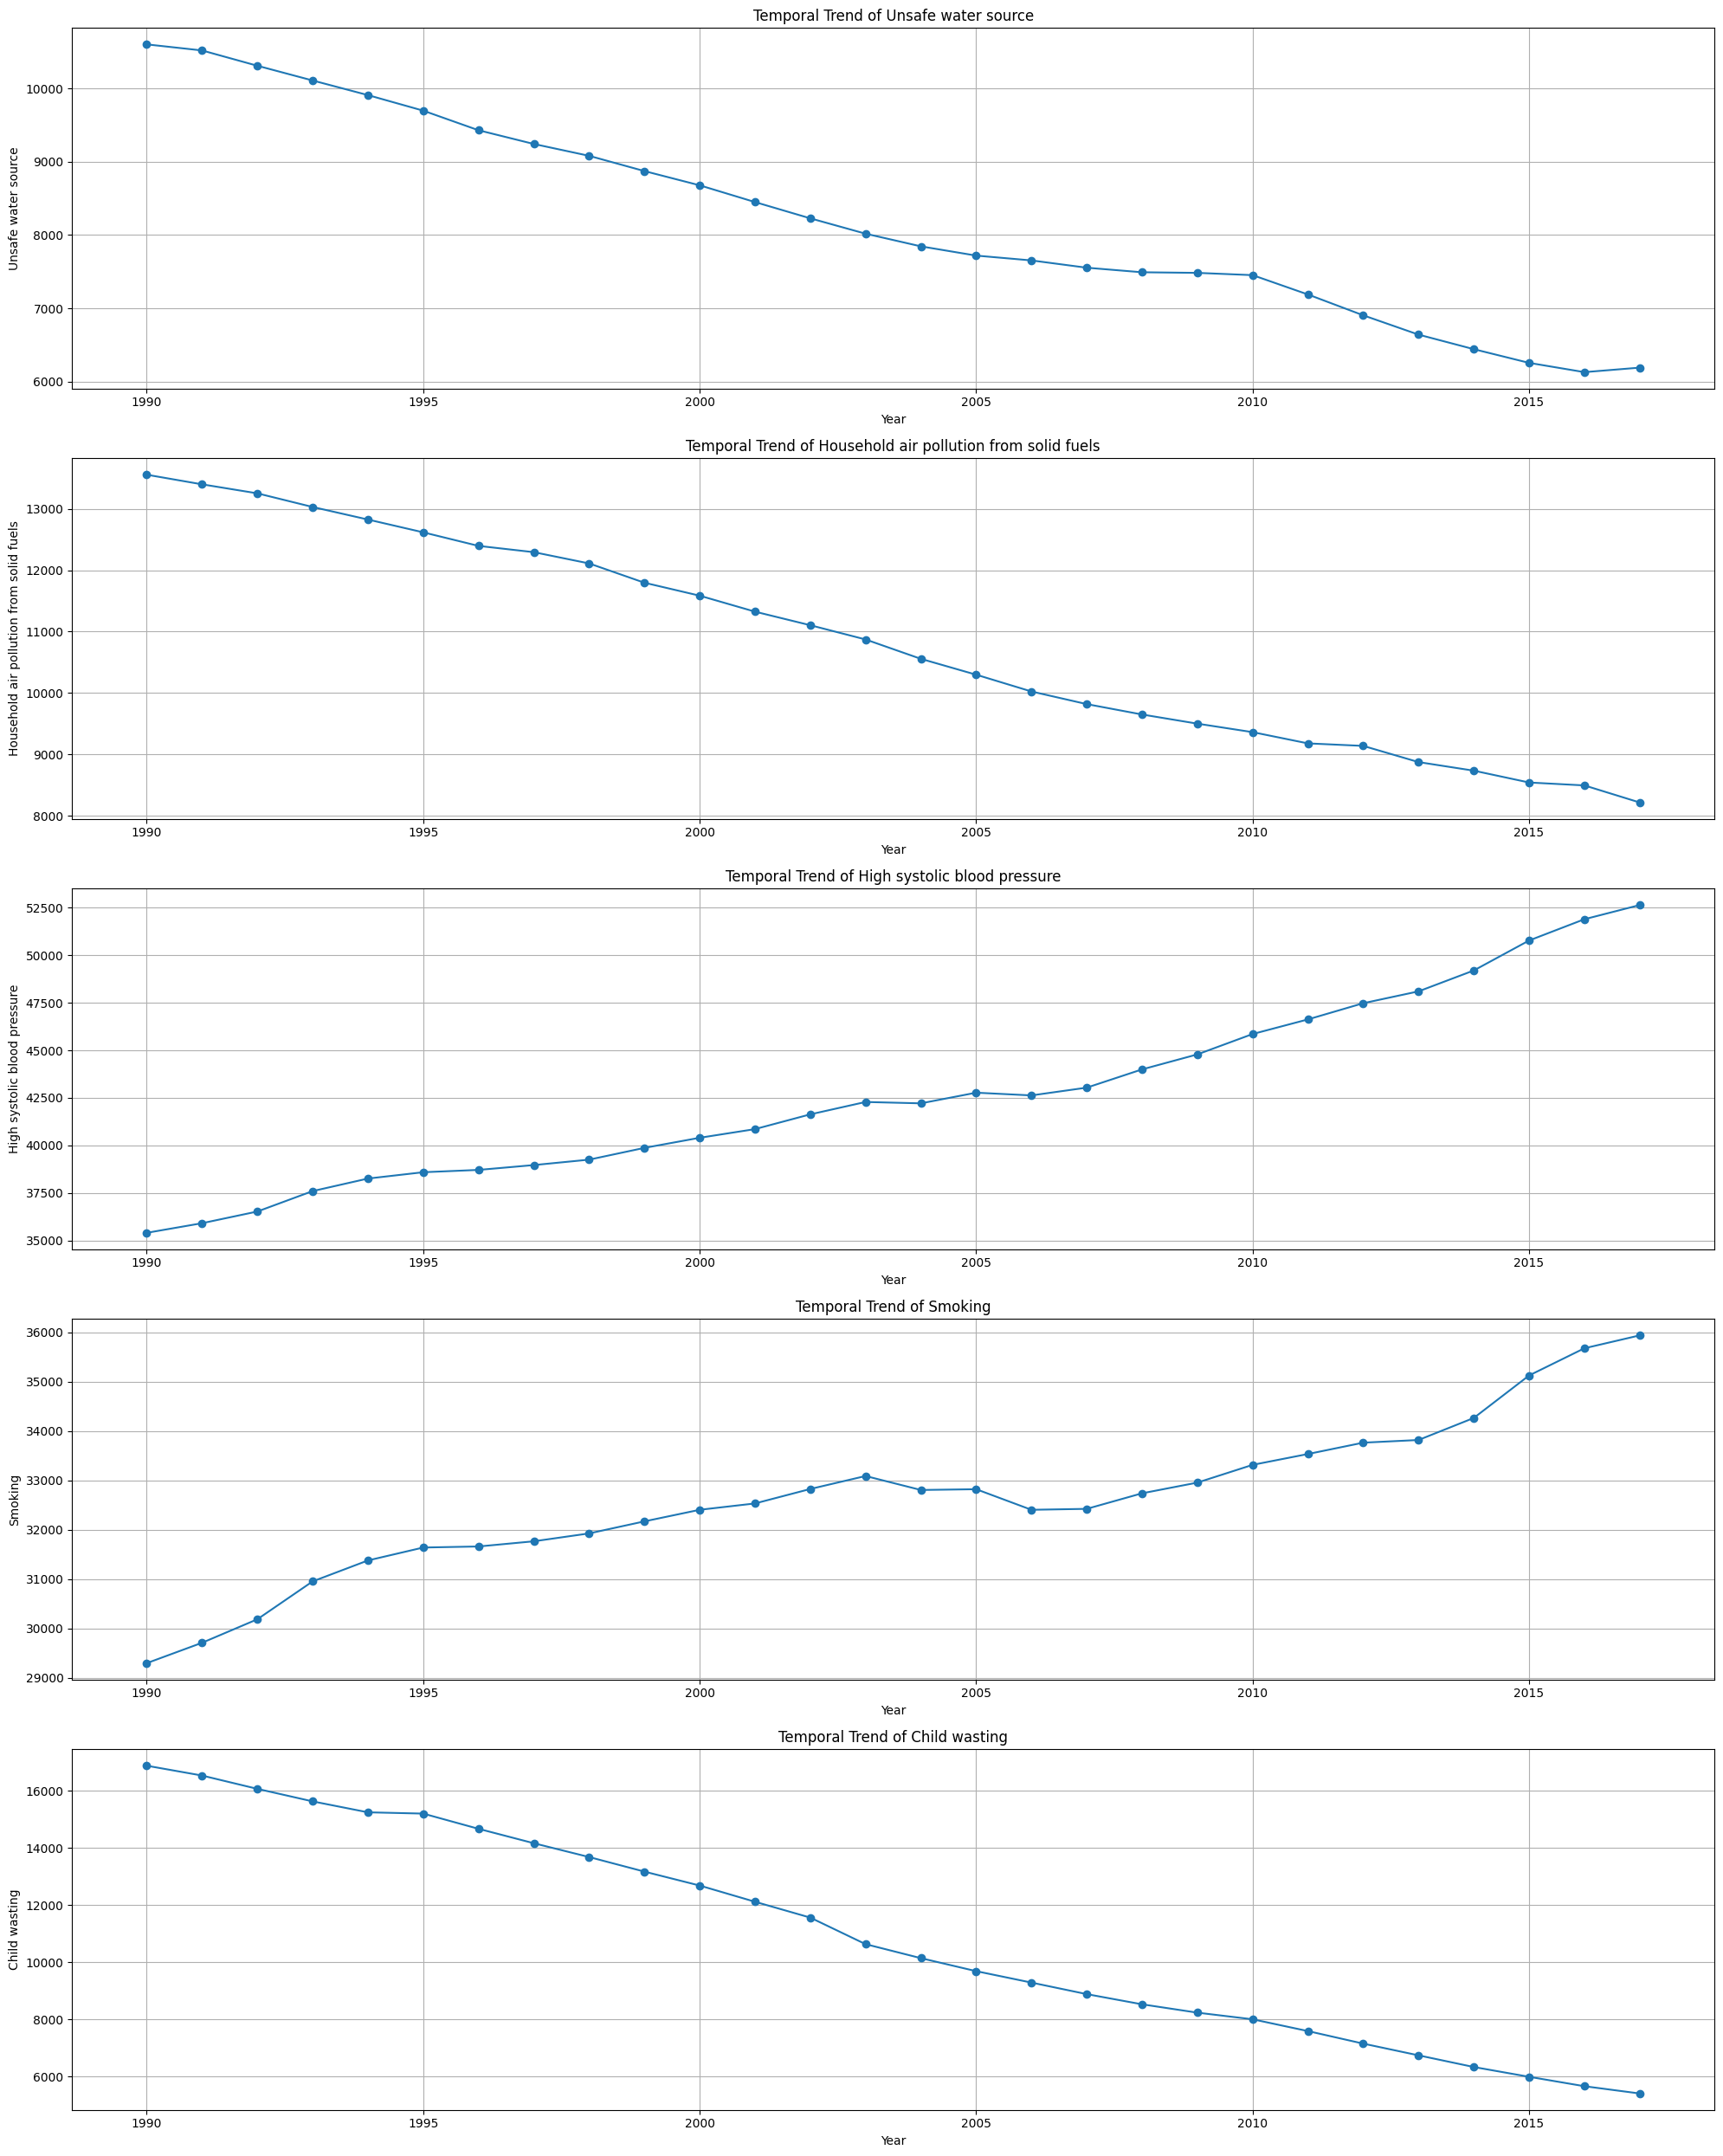

In [104]:
# EDA
import matplotlib.pyplot as plt

# Define the key risk factors
key_risk_factors = [
    'Unsafe water source',
    'Household air pollution from solid fuels',
    'High systolic blood pressure',
    'Smoking',
    'Child wasting'
]

# Create line charts for trends over time for selected risk factors
# Plot temporal trends
plt.figure(figsize=(20, 25))

for i, factor in enumerate(key_risk_factors, 1):
    trend = data.groupby('Year')[factor].mean().reset_index()
    plt.subplot(5, 1, i)
    plt.plot(trend['Year'], trend[factor], marker='o')
    plt.title(f'Temporal Trend of {factor}')
    plt.xlabel('Year')
    plt.ylabel(factor)
    plt.grid(True)

plt.tight_layout()
plt.show()


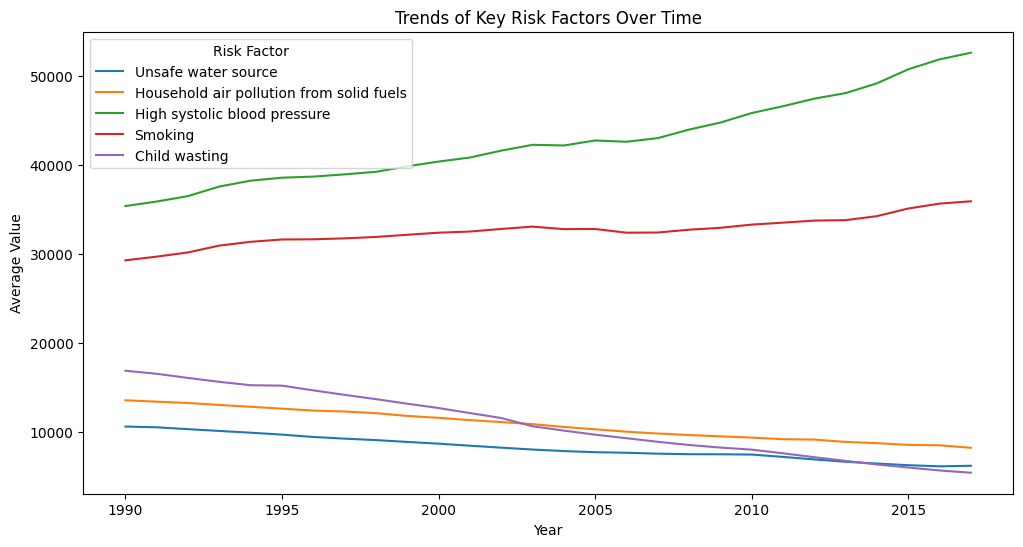

In [107]:
# Calculate the average values of key risk factors over time
risk_factors_over_time = data.groupby('Year')[key_risk_factors].mean()

# Plot the trends of key risk factors over time
risk_factors_over_time.plot(figsize=(12, 6))
plt.title('Trends of Key Risk Factors Over Time')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend(title='Risk Factor')
plt.show()


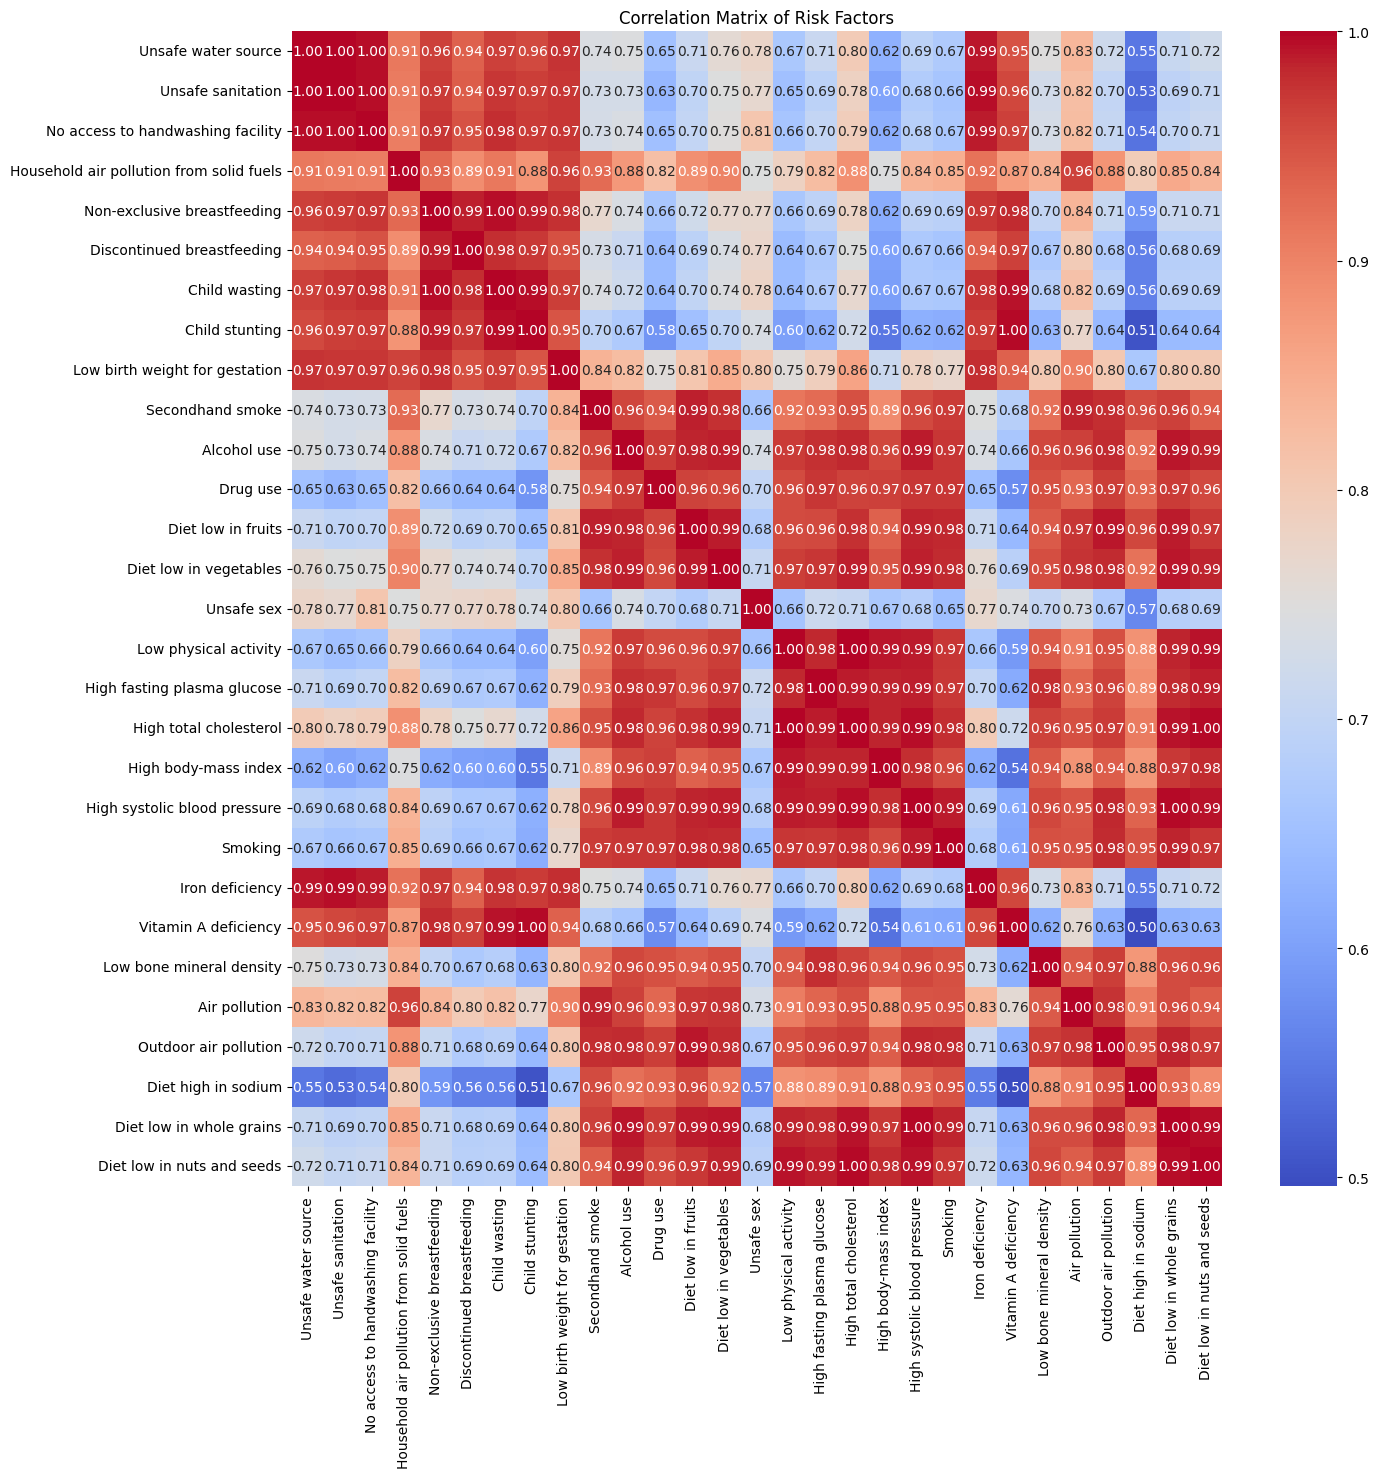

In [ ]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = data.drop(columns=['Year', 'Entity']).corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Risk Factors')
plt.show()


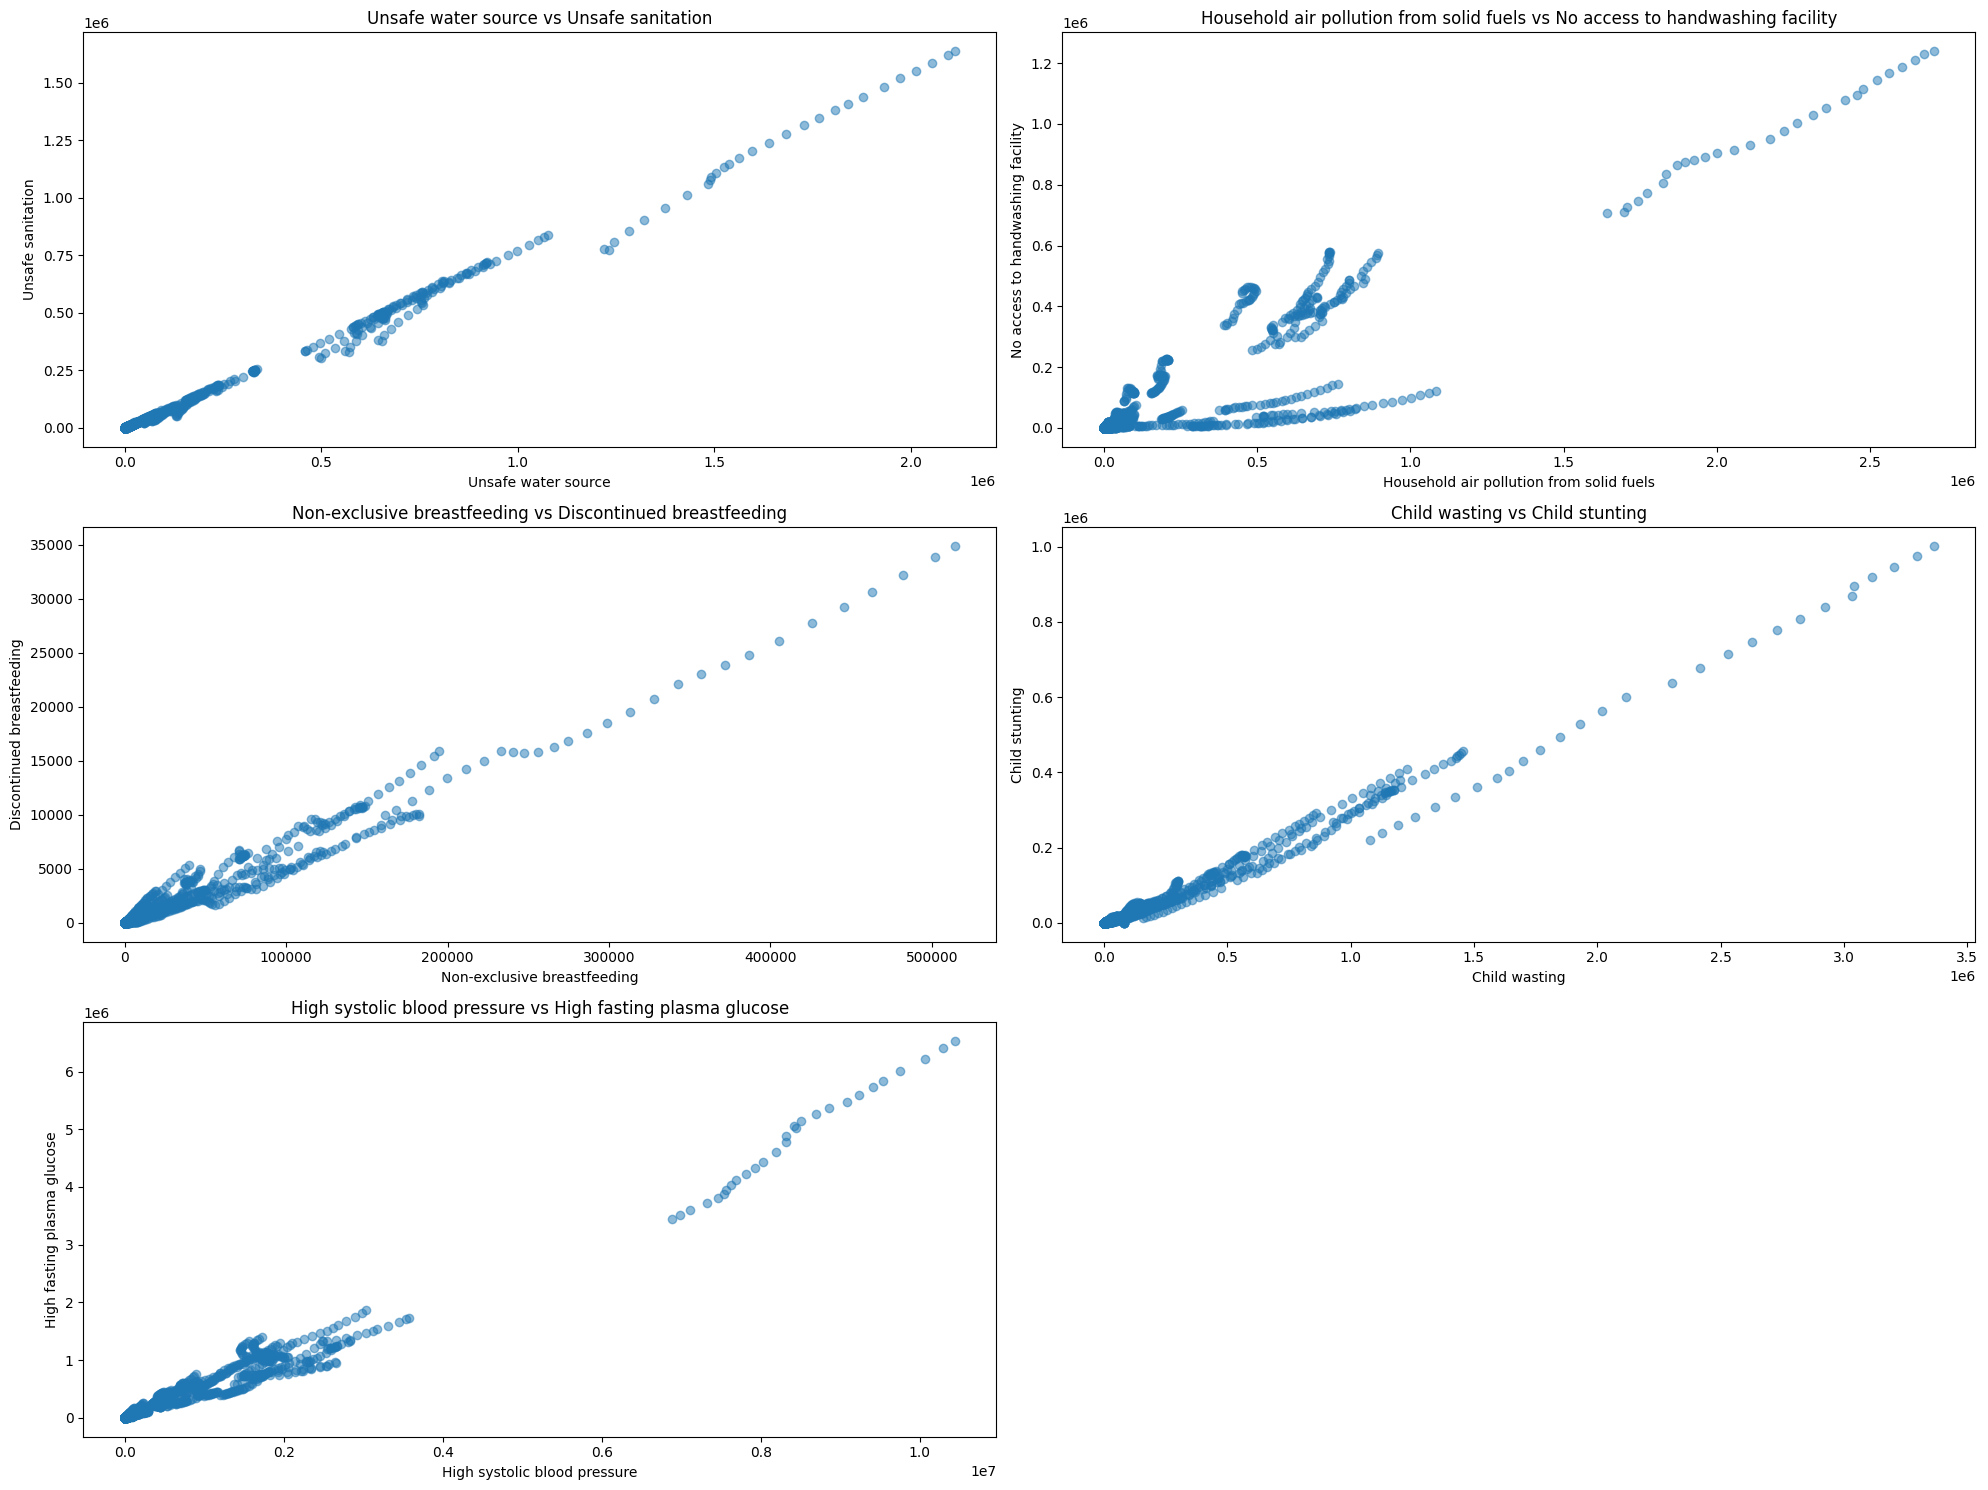

In [ ]:
# Define top correlated pairs
top_correlated_pairs = [
    ('Unsafe water source', 'Unsafe sanitation'),
    ('Household air pollution from solid fuels', 'No access to handwashing facility'),
    ('Non-exclusive breastfeeding', 'Discontinued breastfeeding'),
    ('Child wasting', 'Child stunting'),
    ('High systolic blood pressure', 'High fasting plasma glucose')
]

# Generate scatter plots
plt.figure(figsize=(20, 15))

for i, (factor1, factor2) in enumerate(top_correlated_pairs, 1):
    plt.subplot(3, 2, i)
    plt.scatter(data[factor1], data[factor2], alpha=0.5)
    plt.title(f'{factor1} vs {factor2}')
    plt.xlabel(factor1)
    plt.ylabel(factor2)

plt.tight_layout()
plt.show()


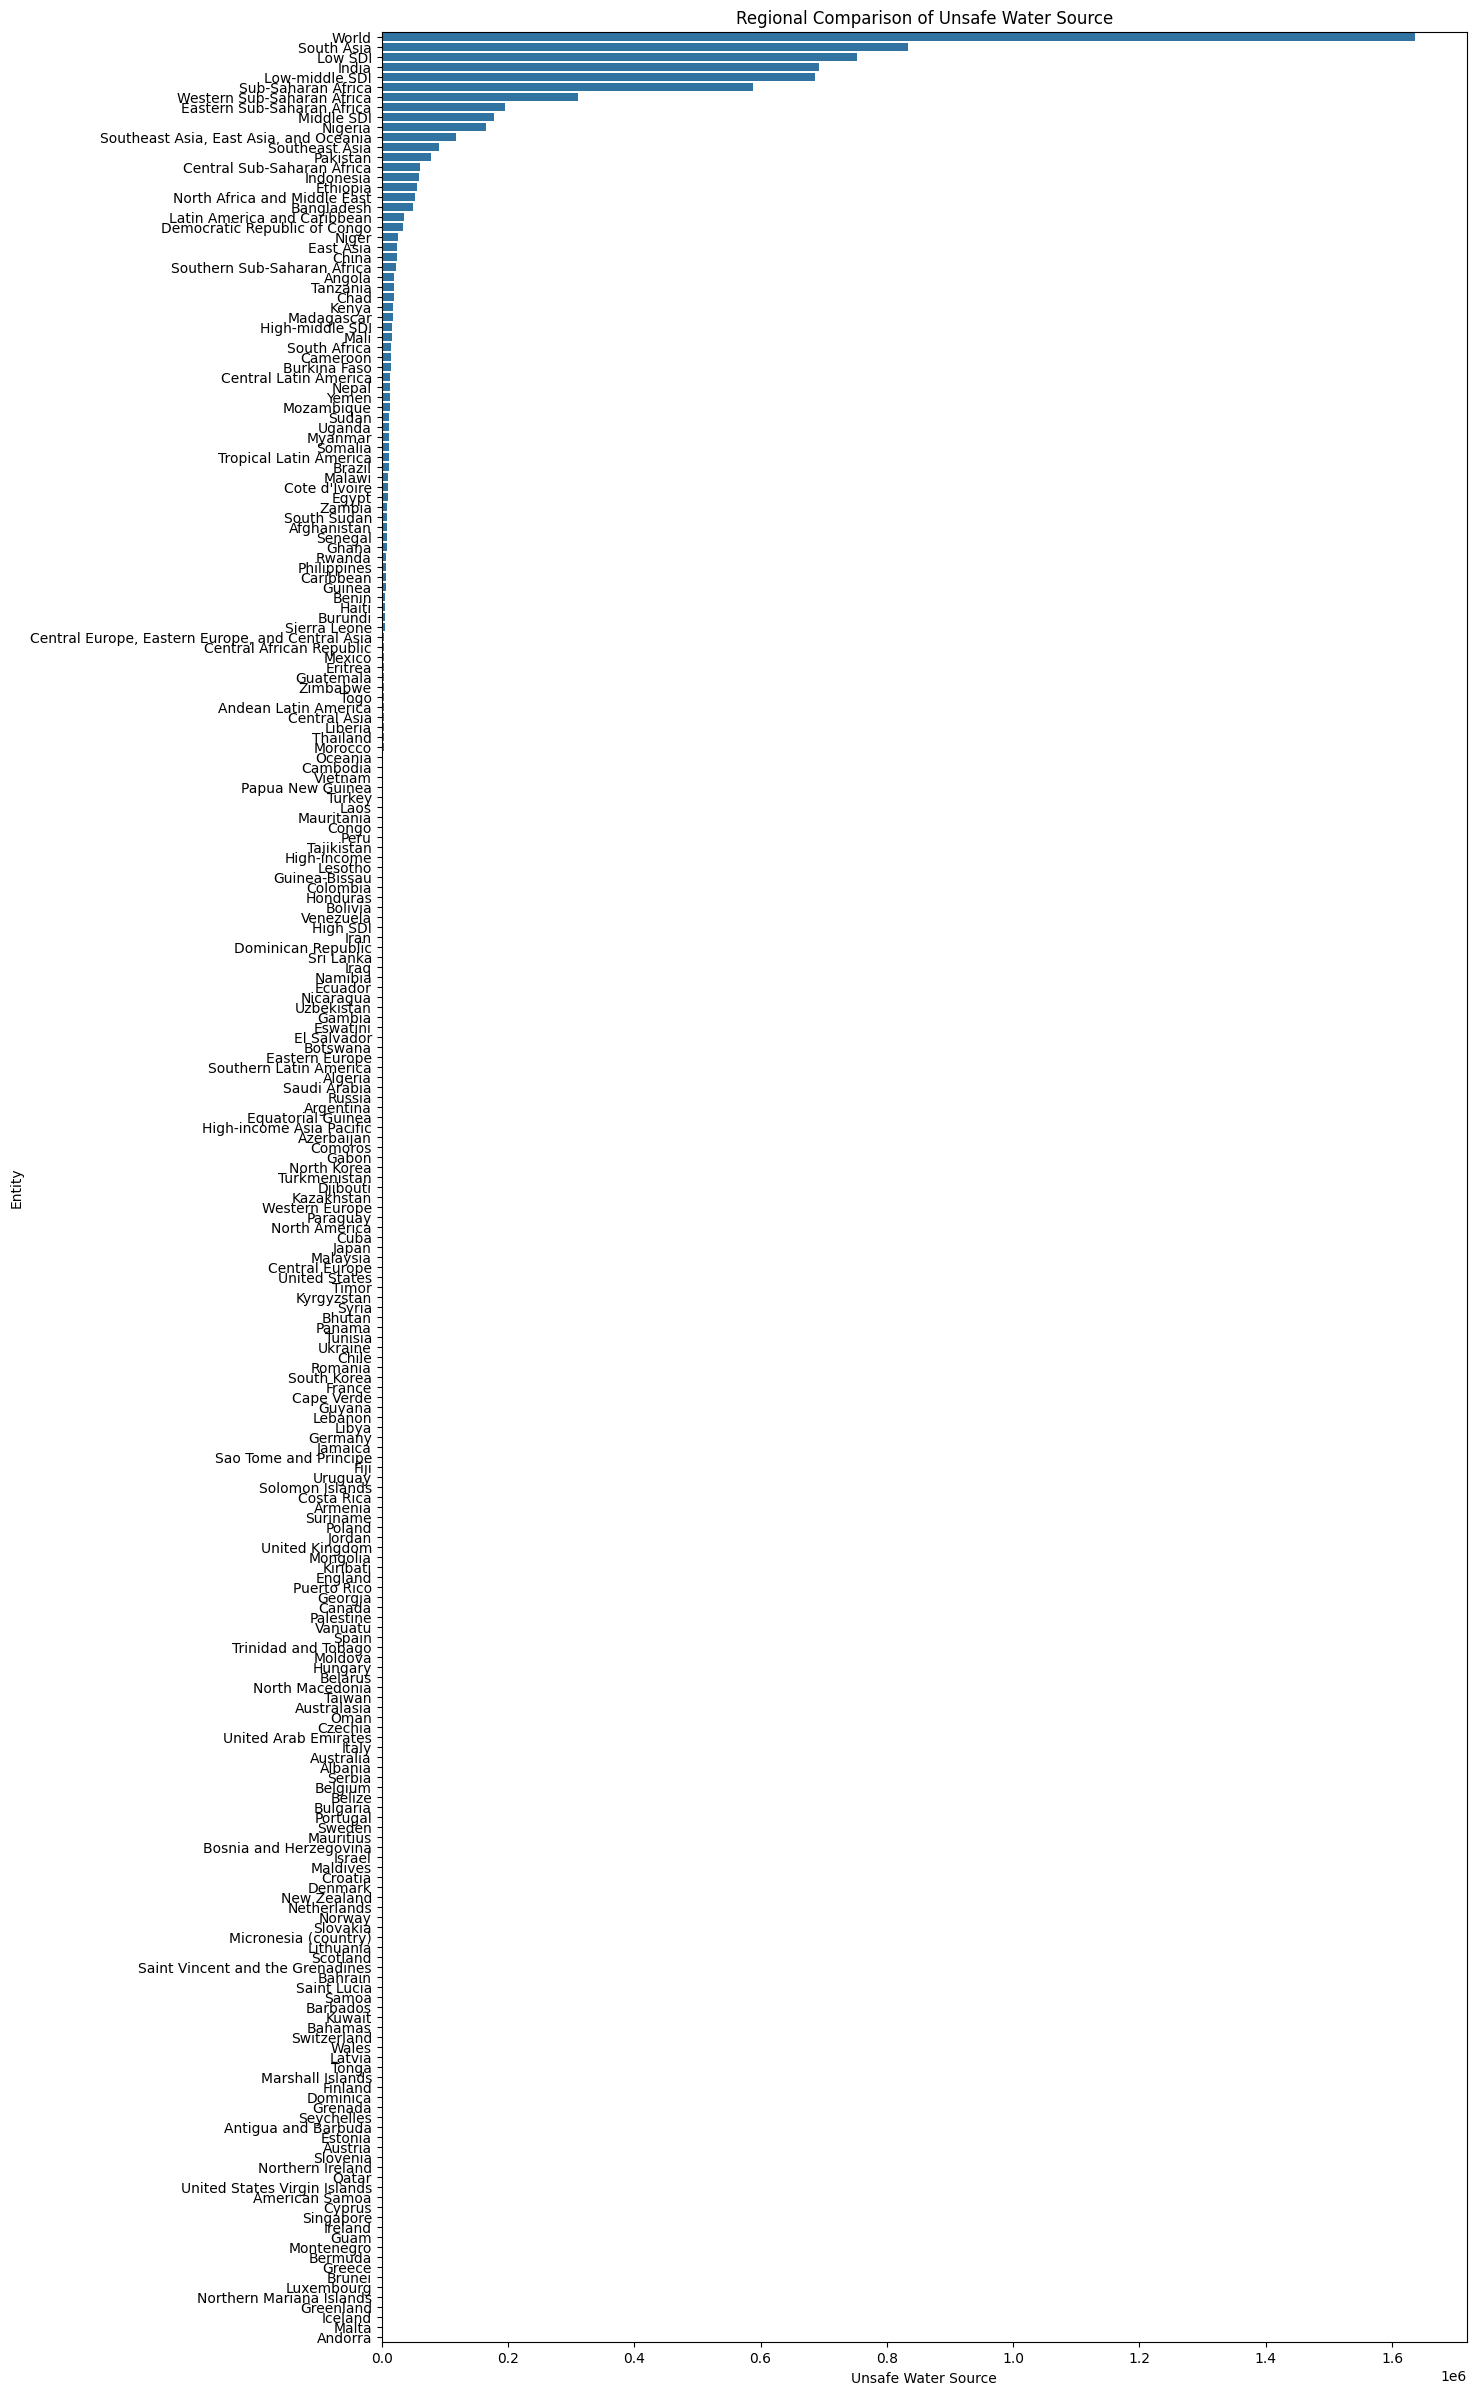

In [ ]:
# Regional Analysis: Example with 'Unsafe water source'
regional_unsafe_water = data.groupby('Entity')['Unsafe water source'].mean().reset_index()

# Plot: Regional comparison of 'Unsafe water source'
plt.figure(figsize=(14, 30))
sns.barplot(x='Unsafe water source', y='Entity', data=regional_unsafe_water.sort_values(by='Unsafe water source', ascending=False))
plt.title('Regional Comparison of Unsafe Water Source')
plt.xlabel('Unsafe Water Source')
plt.ylabel('Entity')
plt.show()

Categorizing Countries to Regions

In [ ]:
# Select the column and display unique values
unique_entities = data['Entity'].unique()

unique_entities

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andean Latin America', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australasia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Caribbean',
       'Central African Republic', 'Central Asia', 'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central Sub-Saharan Africa', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia', 'Eastern Europe'

In [62]:
# Predefined mapping of countries to regions (example, can be extended)
country_to_region = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'American Samoa': 'Oceania',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'Latin America and Caribbean',
    'Armenia': 'Asia',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'Latin America and Caribbean',
    'Benin': 'Africa',
    'Bermuda': 'North America',
    'Bhutan': 'Asia',
    'Bolivia': 'Latin America and Caribbean',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'Latin America and Caribbean',
    'Brunei': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Cape Verde': 'Africa',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'Latin America and Caribbean',
    'China': 'Asia',
    'Colombia': 'Latin America and Caribbean',
    'Comoros': 'Africa',
    'Congo': 'Africa',
    'Costa Rica': 'Latin America and Caribbean',
    "Cote d'Ivoire": 'Africa',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Europe',
    'Czechia': 'Europe',
    'Democratic Republic of Congo': 'Africa',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'Latin America and Caribbean',
    'Egypt': 'North Africa and Middle East',
    'El Salvador': 'Latin America and Caribbean',
    'England': 'Europe',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Eswatini': 'Africa',
    'Ethiopia': 'Africa',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Greenland': 'North America',
    'Grenada': 'North America',
    'Guam': 'Oceania',
    'Guatemala': 'Latin America and Caribbean',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'Latin America and Caribbean',
    'Haiti': 'North America',
    'Honduras': 'Latin America and Caribbean',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran': 'Asia',
    'Iraq': 'North Africa and Middle East',
    'Ireland': 'Europe',
    'Israel': 'North Africa and Middle East',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'North Africa and Middle East',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Kuwait': 'North Africa and Middle East',
    'Kyrgyzstan': 'Asia',
    'Laos': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'North Africa and Middle East',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'North Africa and Middle East',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Marshall Islands': 'Oceania',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'Latin America and Caribbean',
    'Micronesia (country)': 'Oceania',
    'Moldova': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Morocco': 'North Africa and Middle East',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'Latin America and Caribbean',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'North Korea': 'Asia',
    'North Macedonia': 'Europe',
    'Northern Ireland': 'Europe',
    'Northern Mariana Islands': 'Oceania',
    'Norway': 'Europe',
    'Oman': 'North Africa and Middle East',
    'Pakistan': 'Asia',
    'Palestine': 'North Africa and Middle East',
    'Panama': 'Latin America and Caribbean',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'Latin America and Caribbean',
    'Peru': 'Latin America and Caribbean',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Puerto Rico': 'North America',
    'Qatar': 'North Africa and Middle East',
    'Romania': 'Europe',
    'Russia': 'Europe',
    'Rwanda': 'Africa',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'North Africa and Middle East',
    'Scotland': 'Europe',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Korea': 'Asia',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'Latin America and Caribbean',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syria': 'North Africa and Middle East',
    'Taiwan': 'Asia',
    'Tajikistan': 'Asia',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor': 'Asia',
    'Togo': 'Africa',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'North Africa and Middle East',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'North Africa and Middle East',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'United States Virgin Islands': 'North America',
    'Uruguay': 'Latin America and Caribbean',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela': 'Latin America and Caribbean',
    'Vietnam': 'Asia',
    'Wales': 'Europe',
    'Yemen': 'North Africa and Middle East',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}
# Add a 'Region' column to the dataset based on the 'Entity' column
data['Region'] = data['Entity'].map(country_to_region)


In [63]:
# Define lists for regions, SDI categories, and countries
regions_list = [
    'Andean Latin America', 'Australasia', 'Caribbean', 'Central Asia', 'Central Europe',
    'Central Europe, Eastern Europe, and Central Asia', 'Central Latin America', 'Central Sub-Saharan Africa',
    'East Asia', 'Eastern Europe', 'Eastern Sub-Saharan Africa', 'High-income', 'High-income Asia Pacific', 'Latin America and Caribbean',
    'North Africa and Middle East', 'North America', 'Oceania', 'Southeast Asia',
    'Southeast Asia, East Asia, and Oceania', 'Southern Latin America', 'Southern Sub-Saharan Africa',
    'Sub-Saharan Africa', 'Tropical Latin America', 'Western Europe', 'Western Sub-Saharan Africa'
]

sdi_list = [
    'Low SDI', 'Low-middle SDI', 'Middle SDI', 'High-middle SDI', 'High SDI'
]

# List of all entities
all_entities = data['Entity'].unique()

# All other entities are countries
countries_list = [entity for entity in all_entities if entity not in regions_list and entity not in sdi_list]

# Create a dictionary mapping each entity to its category
entity_to_category = {entity: 'Country' for entity in countries_list}
entity_to_category.update({region: 'Region' for region in regions_list})
entity_to_category.update({sdi: 'SDI' for sdi in sdi_list})

# Apply the mapping to the DataFrame to categorize each entity
data['Category'] = data['Entity'].map(entity_to_category)

# Display the unique values in the 'Category' column to verify
print(data['Category'].unique())


['Country' 'Region' 'SDI']


In [64]:
# Separate data into regions, SDI, and countries
data_regions_sdi = data[data['Category'].isin(['Region', 'SDI'])]
data_countries = data[data['Category'] == 'Country']

# Select numeric columns for aggregation
numeric_columns = data_countries.select_dtypes(include=[float, int]).columns

# Calculate regional averages for country-level data
regional_averages_countries = data_countries.groupby('Region')[numeric_columns].mean()

# Calculate averages for SDI categories
sdi_averages = data_regions_sdi.groupby('Entity')[numeric_columns].mean()

# Combine region-level, SDI-level data with calculated averages from country-level data
combined_data = pd.concat([data_regions_sdi.set_index('Entity')[numeric_columns], regional_averages_countries])

# Display the combined data for verification
print(combined_data)

                                Year  Unsafe water source  Unsafe sanitation  \
Andean Latin America          1990.0          9655.695053        6362.911170   
Andean Latin America          1991.0         11535.783800        7792.783076   
Andean Latin America          1992.0          9436.341535        6389.367700   
Andean Latin America          1993.0          8235.669469        5622.606891   
Andean Latin America          1994.0          6939.094398        4750.088832   
...                              ...                  ...                ...   
Europe                        2003.5            26.742495          18.650997   
Latin America and Caribbean   2003.5          1486.104021        1036.648192   
North Africa and Middle East  2003.5          1732.689162        1405.285437   
North America                 2003.5           388.356631         294.291711   
Oceania                       2003.5           192.861595         149.428035   

                              No access

In [65]:
# Debugging: Print the type of each selection to ensure it's a Series
print(type(combined_data.loc['Africa']))
print(type(combined_data.loc['Asia']))
print(type(combined_data.loc['Europe']))
print(type(combined_data.loc['Low SDI']))
print(type(combined_data.loc['High SDI']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


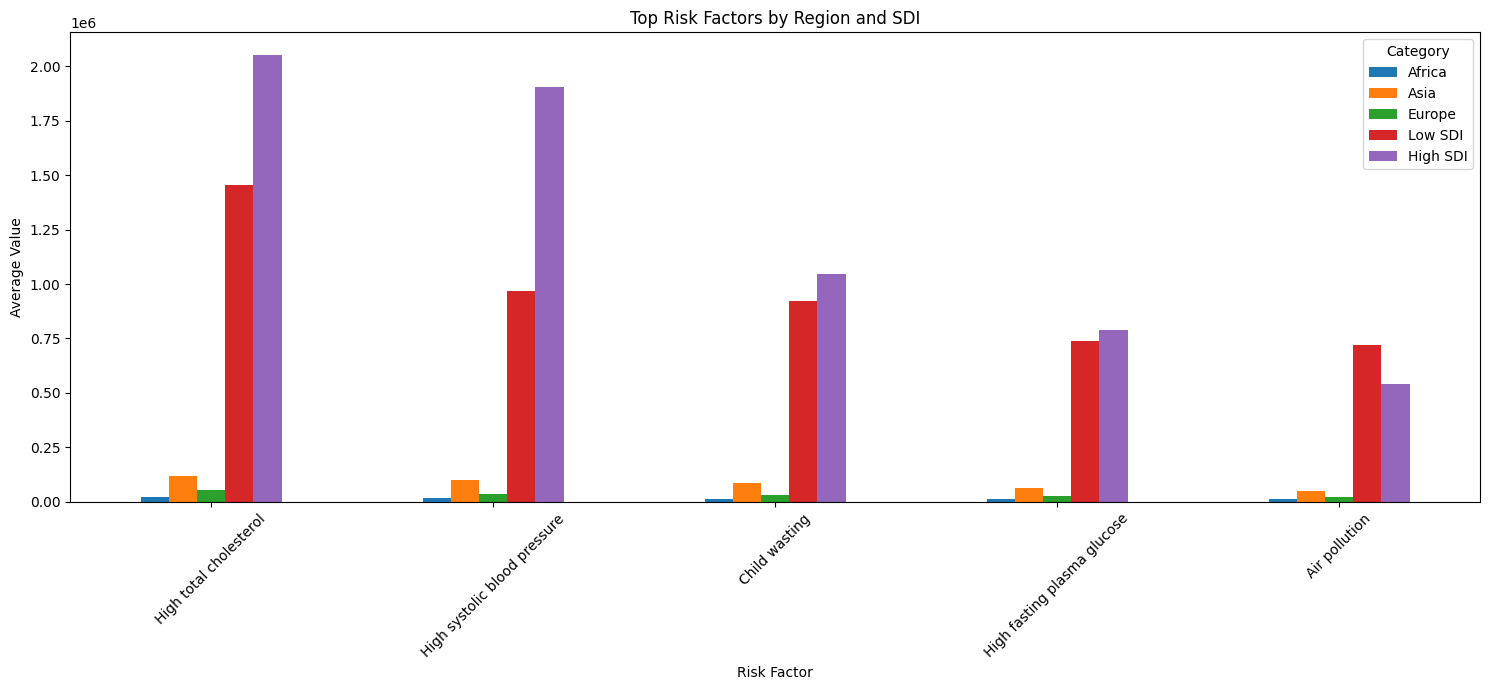

In [105]:
# Identify top 5 risk factors for each region and SDI category
top_risk_factors_africa = combined_data.xs('Africa').sort_values(ascending=False).head(5)
top_risk_factors_asia = combined_data.xs('Asia').sort_values(ascending=False).head(5)
top_risk_factors_europe = combined_data.xs('Europe').sort_values(ascending=False).head(5)

# Handle cases where the selection returns a DataFrame
if isinstance(combined_data.loc['Low SDI'], pd.DataFrame):
    top_risk_factors_low_sdi = combined_data.loc['Low SDI'].iloc[0].sort_values(ascending=False).head(5)
else:
    top_risk_factors_low_sdi = combined_data.loc['Low SDI'].sort_values(ascending=False).head(5)

if isinstance(combined_data.loc['High SDI'], pd.DataFrame):
    top_risk_factors_high_sdi = combined_data.loc['High SDI'].iloc[0].sort_values(ascending=False).head(5)
else:
    top_risk_factors_high_sdi = combined_data.loc['High SDI'].sort_values(ascending=False).head(5)

# Create a comparative table for the top 5 risk factors
comparative_data = {
    'Risk Factor': ['High total cholesterol', 'High systolic blood pressure', 'Child wasting', 'High fasting plasma glucose', 'Air pollution'],
    'Africa': top_risk_factors_africa.values,
    'Asia': top_risk_factors_asia.values,
    'Europe': top_risk_factors_europe.values,
    'Low SDI': top_risk_factors_low_sdi.values,
    'High SDI': top_risk_factors_high_sdi.values
}

# Convert the dictionary to a DataFrame for better visualization
comparative_df = pd.DataFrame(comparative_data)

# Plot the bar charts
comparative_df.set_index('Risk Factor').plot(kind='bar', figsize=(15, 7))
plt.title('Top Risk Factors by Region and SDI')
plt.xlabel('Risk Factor')
plt.ylabel('Average Value')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


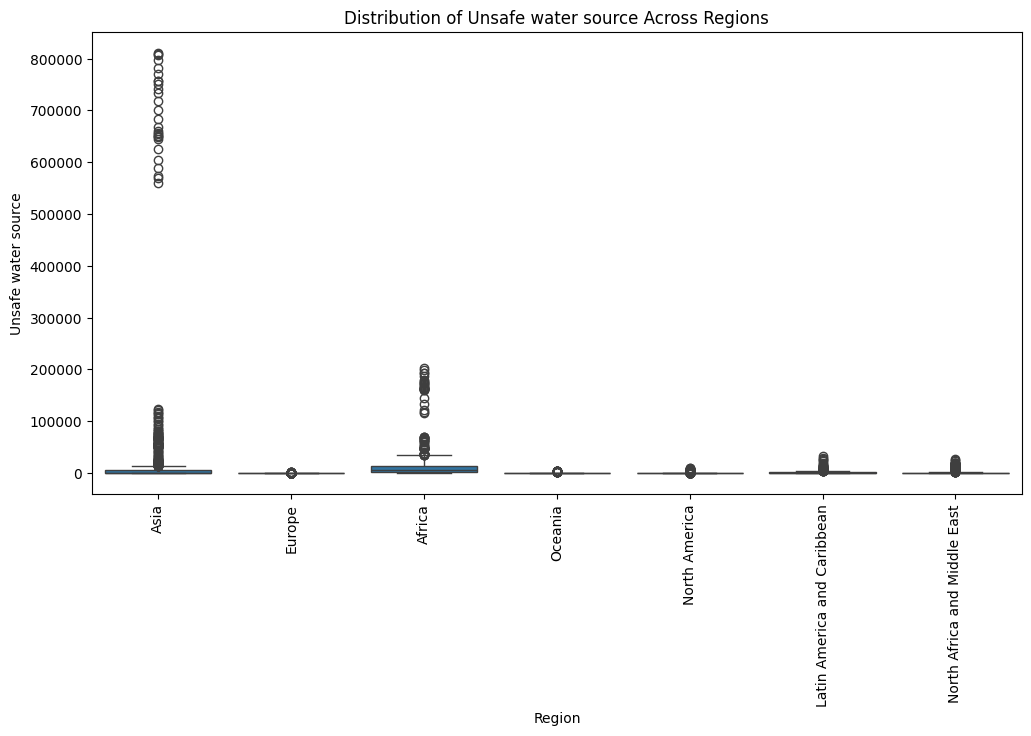

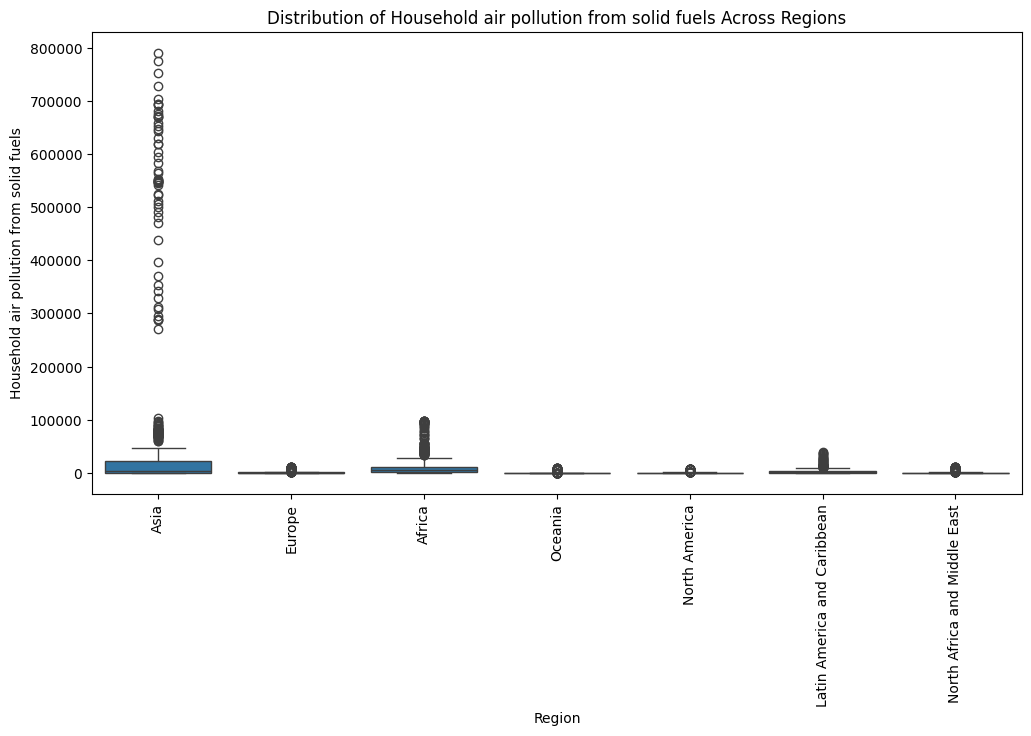

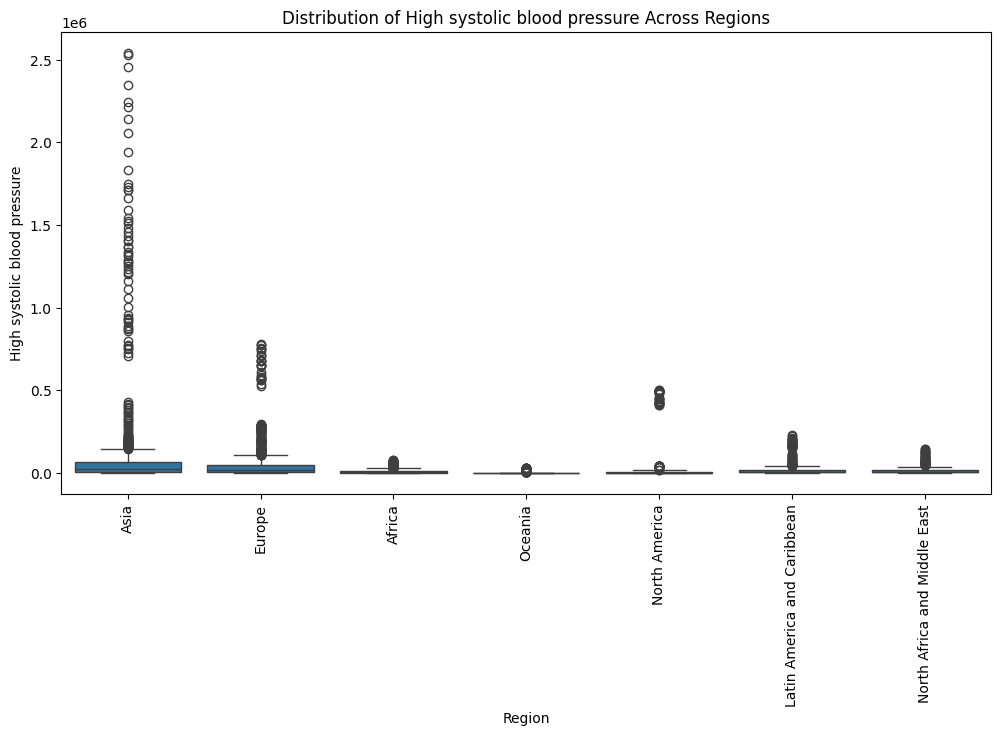

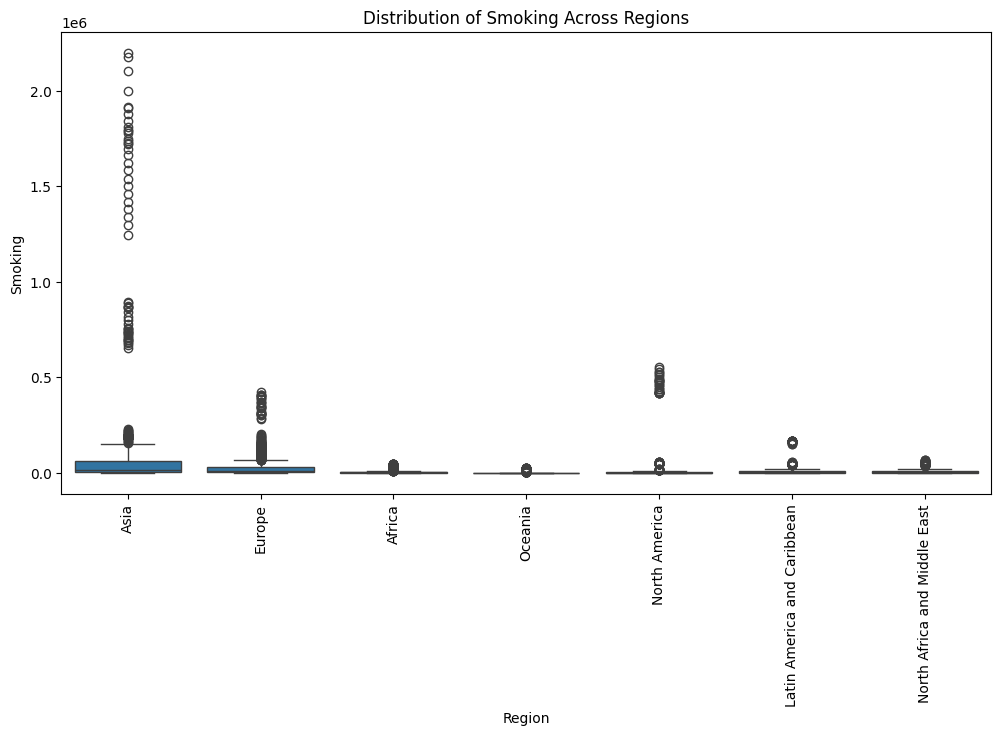

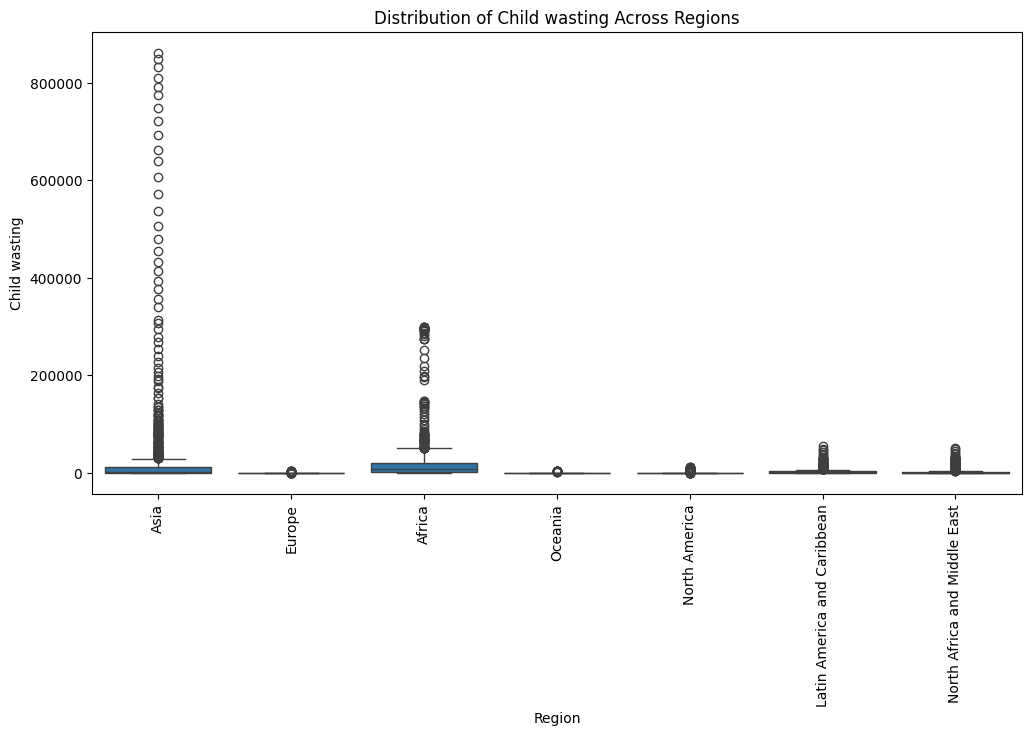

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'Region' not in data.columns:
    data['Region'] = data['Entity'].map(country_to_region)

# Plot the distribution of mortality rates and key risk factors across different regions
for factor in key_risk_factors:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Region', y=factor, data=data)
    plt.title(f'Distribution of {factor} Across Regions')
    plt.xticks(rotation=90)
    plt.show()


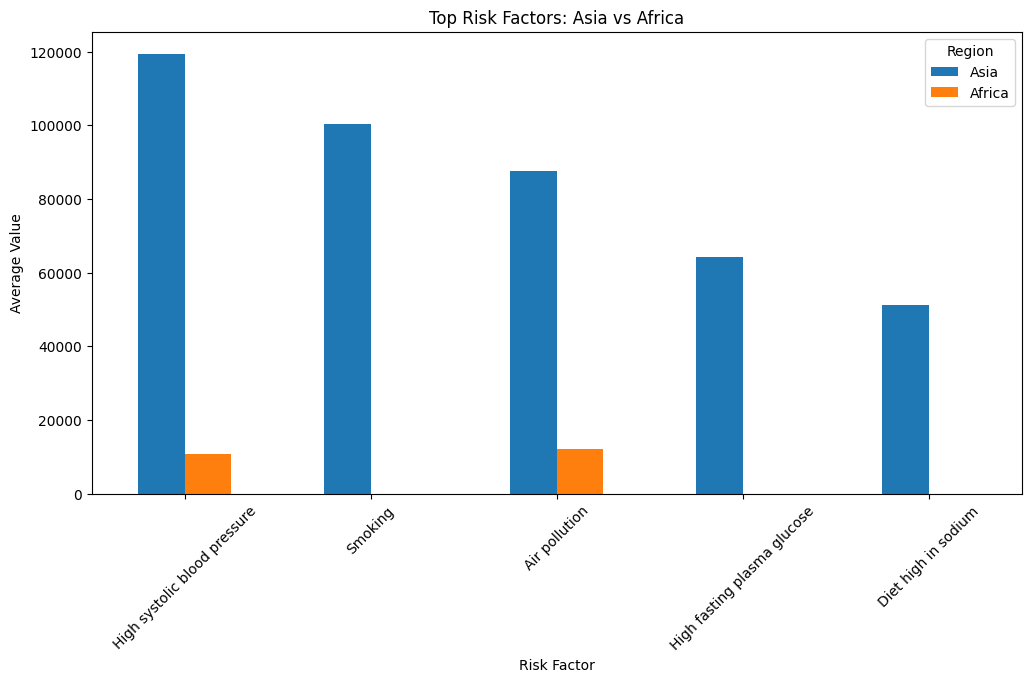

In [73]:
# Extract the top risk factors for Asia and Africa
top_risk_factors_asia = regional_averages_countries.loc['Asia'].sort_values(ascending=False).head(5)
top_risk_factors_africa = regional_averages_countries.loc['Africa'].sort_values(ascending=False).head(5)

# Create a comparative table for the top risk factors
comparative_data_asia_africa = {
    'Risk Factor': top_risk_factors_asia.index,
    'Asia': top_risk_factors_asia.values,
    'Africa': top_risk_factors_africa.reindex(top_risk_factors_asia.index).values
}

comparative_df_asia_africa = pd.DataFrame(comparative_data_asia_africa)

# Plot the comparison
comparative_df_asia_africa.set_index('Risk Factor').plot(kind='bar', figsize=(12, 6))
plt.title('Top Risk Factors: Asia vs Africa')
plt.xlabel('Risk Factor')
plt.ylabel('Average Value')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.show()


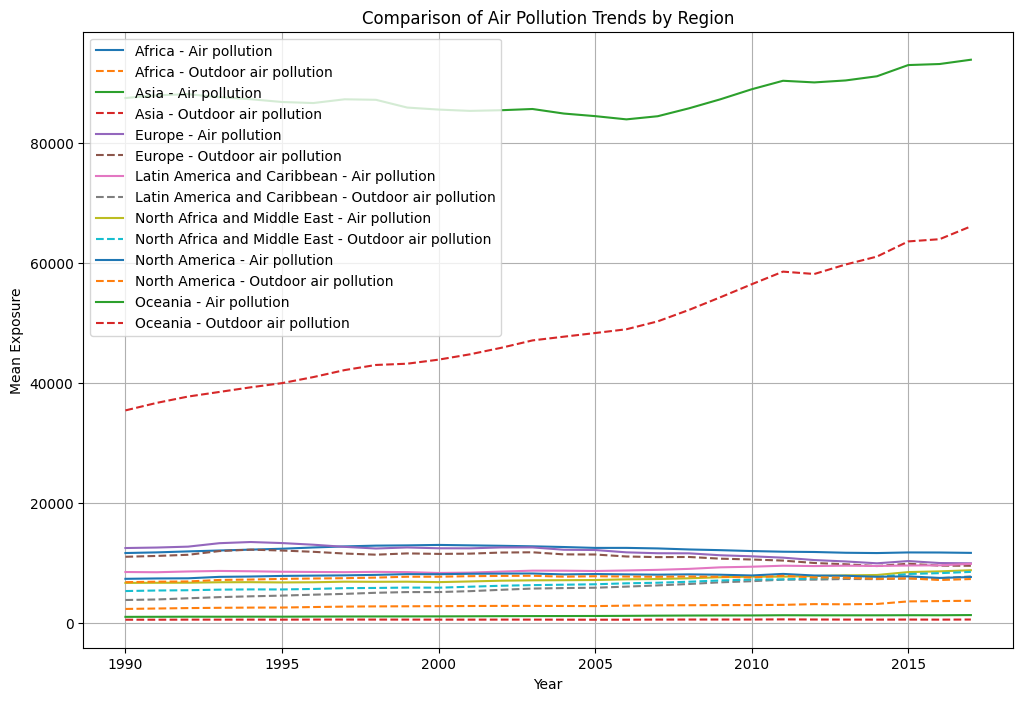

In [82]:
# Filter out rows where the region is not defined (i.e., NaN)
data = data.dropna(subset=['Region'])

# Group by region and year, then calculate the mean air pollution for each region per year
region_air_pollution = data.groupby(['Region', 'Year'])[['Air pollution', 'Outdoor air pollution']].mean().reset_index()

# Plot the trends for each region
plt.figure(figsize=(12, 8))
for region in region_air_pollution['Region'].unique():
    region_data = region_air_pollution[region_air_pollution['Region'] == region]
    plt.plot(region_data['Year'], region_data['Air pollution'], label=f'{region} - Air pollution')
    plt.plot(region_data['Year'], region_data['Outdoor air pollution'], label=f'{region} - Outdoor air pollution', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Mean Exposure')
plt.title('Comparison of Air Pollution Trends by Region')
plt.legend()
plt.grid(True)
plt.show()

In [91]:
# Calculate the average values for each risk factor by region and SDI category
numeric_columns = data.select_dtypes(include=[float, int]).columns

# Calculate regional averages for country-level data
regional_averages_countries = data[data['Category'] == 'Country'].groupby('Region')[numeric_columns].mean()

# Identify the top five risk factors for each region
top_risk_factors_by_region = regional_averages_countries.apply(lambda x: x.sort_values(ascending=False).head(5), axis=1)

print("Top Risk Factors by Region:\n", top_risk_factors_by_region)

Top Risk Factors by Region:
                               Air pollution  Child wasting  \
Region                                                       
Africa                         12216.943616   19795.844046   
Asia                           87718.544018            NaN   
Europe                                  NaN            NaN   
Latin America and Caribbean             NaN            NaN   
North Africa and Middle East            NaN            NaN   
North America                           NaN            NaN   
Oceania                                 NaN            NaN   

                              Diet high in sodium  High body-mass index  \
Region                                                                    
Africa                                        NaN                   NaN   
Asia                                 51229.118587                   NaN   
Europe                                        NaN          23438.814289   
Latin America and Caribbean          